<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 7.1: Data Exploration II (Multivariate Data)

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

## Q1

In this question, we will use the dataset found in Lab7iQ1.csv.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Lab7iQ1.csv')
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


a) Use a stripplot to visualize the life expectancy data grouped by continents.

<AxesSubplot:xlabel='continent', ylabel='lifeExp'>

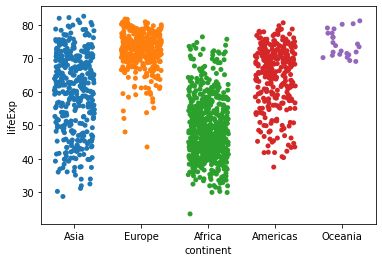

In [2]:
#your solution
sns.stripplot(x="continent", y="lifeExp", data=df, jitter=0.3)

Hence, comment on the spread of the respective distribution for the respective continents.

    For Europe, Asia and Americas, the distribution is skewed downwards. For the rest, it is skewed upwards Asia has the largest range, with Africa having the second largest, and Americas having the third largest. Europe has the second smallest range and Oceania has the smallest range.

b) Use a swarmplot to visualize the life expectancy data grouped by continents for year 2007 and 50 years ago.

<AxesSubplot:xlabel='continent', ylabel='lifeExp'>

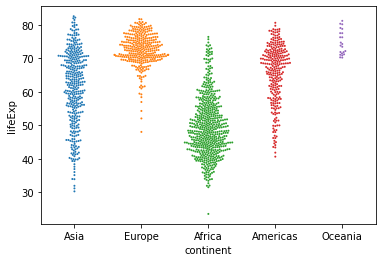

In [3]:
#your solution
sns.swarmplot(x="continent", y="lifeExp", data=df[np.logical_and(1957<=df["year"], df["year"]<=2007)], size=2)

Hence, compare the life expectancy for 2007 and 50 years ago across the respective continents.

    In 2007, and 50 years ago, Europe and Oceania appear to have the greatest median life 
    expectancy, followed by the Americas and then Asia, with Africa having the lowest
    median. Europe has the greatest mode, and Oceania has the lowest mode. Asia has the
    largest IQR, with Europe having the smallest


c) Plot a side by side boxplot for life expectancy and continent.

<AxesSubplot:xlabel='continent', ylabel='lifeExp'>

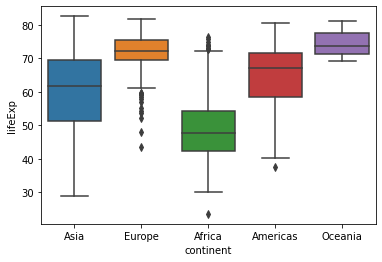

In [4]:
#your solution
sns.boxplot(x="continent", y="lifeExp", data=df)


Hence, compare the distribution of life expectancy in the respective continents.

    Oceania has the greatest median life expectancy, followed by Europe, the Americas, and Asia, with Africa having the lowest median. Asia has the highest IQR, followed by the Americas and Africa, and Europe and Oceania have the lowest IQR. Asia has the widest variation in life expectancy, followed by Africa and the Americas, Europe, and Oceania, which has the narrowest range. Outliers are most prevalent in Europe, with all of them falling below the distribution. Africa also contains several outliers above the norm. Asia and Americas are skewed downwards, while the rest is skewed downwards

d) Overlay a stripplot on the boxplot from (c).

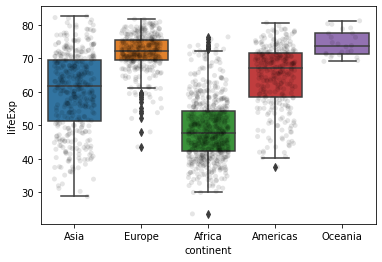

In [6]:
#your solution
sns.boxplot(x="continent", y="lifeExp", data=df)
sns.stripplot(x="continent", y="lifeExp", data=df, jitter=0.3, color="black", alpha=0.1)
plt.show()

e) We would like to compare the life expectancy by contintent, for every 10 years until 2007. Draw a grouped boxplot for the comparison. 

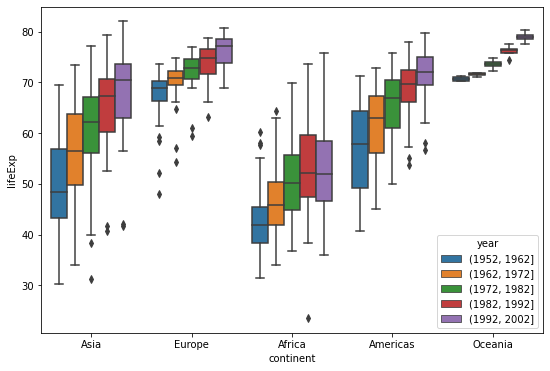

In [29]:
#your solution
plt.figure(figsize=(9,6))
bins = np.arange((df["year"].min()), 2008, 10)
sns.boxplot(x="continent", y="lifeExp", data=df, hue=pd.cut(df["year"], bins))
plt.show()

Hence, compare the distribution of life expectancy in the respective continents over the years.

    For Asia, IQR has decreased slightly. For Europe, the IQR and range has changed. For Africa, range and IQR are rising. For Americas, the range and IQR have decreased severly. For Oceania, range has expanded, but IQR has increased. 

f) We would like to compare the changes in the GDP per capital for the following places: 'Singapore','Japan','Hong Kong China', 'Korea Rep.'. 

Explore what is a `pointplot` from seaborn and how it could be useful for your visualization for this question.

<AxesSubplot:xlabel='country', ylabel='gdpPercap'>

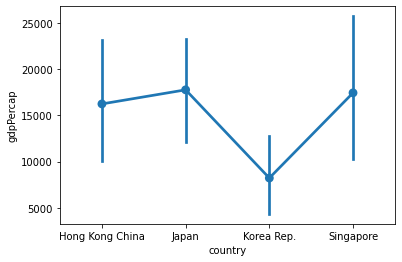

In [13]:
#your solution
sns.pointplot(x="country", y="gdpPercap", data=df[df["country"].isin(["Singapore", "Japan", "Hong Kong China", "Korea Rep."])])


i) Hence, summarize your understanding of a pointplot. What does the vertical line on each point represents?

    They are error bars

ii) Write down your observations from the plot below. 

    South Korea has the lowest mean GDP per capita of the four nations, followed by Hong Kong,
    Singapore, and Japan, which has the highest mean GDP per capita. Singapore has the
    most uncertainty, followed by Hong Kong and Japan, with South Korea having the least.


g) We would like to compare the changes in the GDP per capital for the following places: 'Singapore','Japan','Hong Kong China', 'Korea Rep.' over the years.

Explore what is a `lineplot` from seaborn and how it could be useful for your visualization for this question.

<AxesSubplot:xlabel='year', ylabel='gdpPercap'>

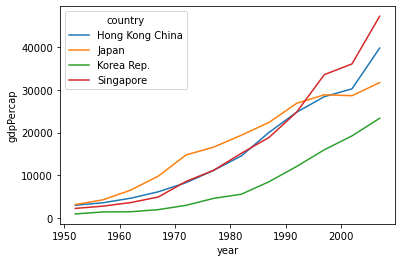

In [17]:
#your solution
sns.lineplot(x="year", y="gdpPercap", data=df[df["country"].isin(["Singapore", "Japan", "Hong Kong China", "Korea Rep."])], hue="country")

i) Hence, summarize your understanding of a lineplot.

    Line plot is a point plot without the point markings  


ii) Draw a pointplot for the above data. 

<AxesSubplot:xlabel='year', ylabel='gdpPercap'>

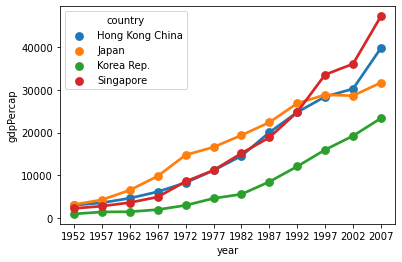

In [18]:

sns.pointplot(x="year", y="gdpPercap", data=df[df["country"].isin(["Singapore", "Japan", "Hong Kong China", "Korea Rep."])], hue="country")

Are there any differences between a lineplot and a pointplot?

    There are points in the pointplot


iii) Write down your observations from the plot below. 

    All countries started with roughly the same GDP per capita. South Korea's GDP per capita grew the slowest, while Singapore's GDP per capita grew the fastest. Singapore ultimately had the greatest GDP per capita, followed by Hong Kong, Japan, and South Korea.


## Q2

In this question, we will use the World Happiness Report, which is a survey about the state of global happiness. The data is imported as follows:

In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv('Lab7iQ2.csv', index_col=0)
data.sort_values(['Year', "Happiness Score"], ascending=[True, False], inplace=True)
data.head()

,Country,Region,Happiness Rank,Happiness Score,Year
141,Switzerland,Western Europe,1.0,7.587,2015
60,Iceland,Western Europe,2.0,7.561,2015
38,Denmark,Western Europe,3.0,7.527,2015
108,Norway,Western Europe,4.0,7.522,2015
25,Canada,North America,5.0,7.427,2015


a) Summarize the happiness score by year in a table.

In [21]:
#your solution
data.groupby("Year")["Happiness Score"].mean()

Year
2015    5.375734
2016    5.382185
2017    5.354019
Name: Happiness Score, dtype: float64

b) Summarize the happiness score by region in a table.

In [22]:
#your solution
data.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.302500
Central and Eastern Europe         5.371184
Eastern Asia                       5.632333
Latin America and Caribbean        6.069074
Middle East and Northern Africa    5.387879
North America                      7.227167
Southeastern Asia                  5.364077
Southern Asia                      4.590857
Sub-Saharan Africa                 4.150957
Western Europe                     6.693000
Name: Happiness Score, dtype: float64

c) Summarize the happiness score by region, per year in a table.


Sample output:
<table border="1" class="dataframe">
<thead>
<tr>
<th></th>
<th></th>
<th>Happiness Score</th>
</tr>
<tr>
<th>Region</th>
<th>Year</th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td rowspan="3" valign="top">Australia and New Zealand</td>
<td>2015</td>
<td>7.285000</td>
</tr>
<tr>
<td>2016</td>
<td>7.323500</td>
</tr>
<tr>
<td>2017</td>
<td>7.299000</td>
</tr>
</tbody>
</table>

In [31]:
#your solution
data.groupby(["Region","Year"])[["Happiness Score"]].mean()

Happiness Score
Region                          Year                 
Australia and New Zealand       2015         7.285000
                                2016         7.323500
                                2017         7.299000
Central and Eastern Europe      2015         5.332931
                                2016         5.370690
                                2017         5.409931
Eastern Asia                    2015         5.626167
                                2016         5.624167
                                2017         5.646667
Latin America and Caribbean     2015         6.144682
                                2016         6.101750
                                2017         5.957818
Middle East and Northern Africa 2015         5.406900
                                2016         5.386053
                                2017         5.369684
North America                   2015         7.273000
                                2016         7.254000
                                2017         7.154500
Southeastern Asia               2015         5.317444
                                2016         5.338889
                                2017         5.444875
Southern Asia                   2015         4.580857
                                2016         4.563286
                                2017         4.628429
Sub-Saharan Africa              2015         4.202800
                                2016         4.136421
                                2017         4.111949
Western Europe                  2015         6.689619
                                2016         6.685667
                                2017         6.703714

d) Summarize the happiness score by region, per year similar to (c), but we whould like the years to be in columns.

Sample output:
<table border="1" class="dataframe">
<thead>
<tr>
<th>Year</th>
<th>2015</th>
<th>2016</th>
<th>2017</th>
</tr>
<tr>
<th>Region</th>
<th></th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Australia and New Zealand</td>
<td>7.285000</td>
<td>7.323500</td>
<td>7.299000</td>
</tr>
<tr>
<td>Central and Eastern Europe</td>
<td>5.332931</td>
<td>5.370690</td>
<td>5.409931</td>
</tr>
</tbody>
</table>

In [24]:
#your solution
data.groupby(["Region","Year"], as_index=False)["Happiness Score"].mean().pivot(index="Region", columns="Year")


Happiness Score                    
Year                                       2015      2016      2017
Region                                                             
Australia and New Zealand              7.285000  7.323500  7.299000
Central and Eastern Europe             5.332931  5.370690  5.409931
Eastern Asia                           5.626167  5.624167  5.646667
Latin America and Caribbean            6.144682  6.101750  5.957818
Middle East and Northern Africa        5.406900  5.386053  5.369684
North America                          7.273000  7.254000  7.154500
Southeastern Asia                      5.317444  5.338889  5.444875
Southern Asia                          4.580857  4.563286  4.628429
Sub-Saharan Africa                     4.202800  4.136421  4.111949
Western Europe                         6.689619  6.685667  6.703714

e) Plot a grouped bar chart for the table in (d).

<AxesSubplot:xlabel='Region'>

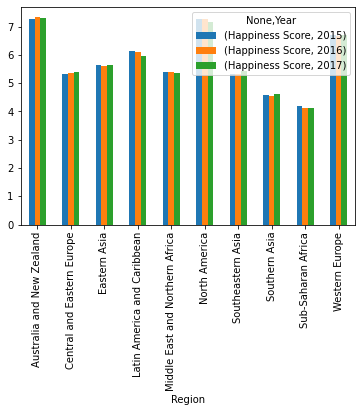

In [25]:
#your solution
data.groupby(["Region","Year"], as_index=False)["Happiness Score"].mean().pivot(index="Region", columns="Year").plot(kind="bar")

f) Using relevant visualization(s), investigate the happiness score of countries in South East Asia over the years.

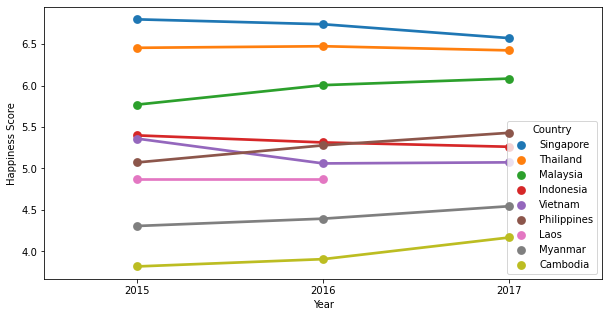

In [28]:
#your solution
plt.figure(figsize=(10,5))
sns.pointplot(x="Year", y="Happiness Score", data=data[data["Region"]=="Southeastern Asia"], hue="Country")
plt.show()

Write down your observations below.

    Singapore has the greatest overall happiness score, while Cambodia has the lowest. Singapore and Indonesia have lower happiness scores from 2015 to 2017. Malaysia, the Philippines, Myanmar, and Cambodia all improved their happiness scores between 2015 and 2017. Thailand and Vietnam have generally consistent satisfaction scores between 2015 and 2017. Laos had the same happiness rating in 2015 and 2016, but did not appear in 2017.


g) You are to shortlist a question you wish to investigate (and not already covered above) using the data given.
Based on what you have learnt thus far, perform relevant EDA to help answer your question.
Hence, state your observations/conclusion.

<AxesSubplot:xlabel='Year', ylabel='Happiness Rank'>

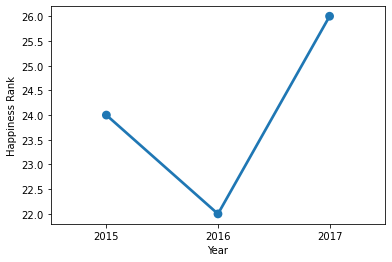

In [33]:
#your solution
# How has the happiness rank changed over time for Singapore?
sns.pointplot(x="Year", y="Happiness Rank", data=data[data["Country"]=="Singapore"])

    Initially, Singapore had a Happiness Rank of 24.0 in 2015. However it decreased to 
    22.0 in 2016. In 2017, it increased again to 26.0
